In [ ]:
# lets import all required libraries

# for mathematical operations
import numpy as np
# fro dataframe operations 
import pandas as pd

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# fro machine learning 
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize']=(16,5)
# setting up the size of the plot 
plt.style.use('fivethirtyeight')


**Reading the Dataset**


*   Here we having two datasets, i.e., Training and Testing Datasets
*   we will read the bot the datasets
*   Training dataset will use to train the Machine learning Models
*   After learning the patterns from the testing datasets,We have to predict the Target variable.







In [ ]:
#reading the datasets

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

**Examining the Data**
* This is an imortant step in Data Science and Machine Learning to ensure about the columns and rows present.
* First, we will check the shape of the dataset
* Second, we will check the head,tail and sample of the datasets
* Third,will check  the Data Discription
* Then we will check the Data Types of the columns present in the data.
* Atlast will check the Target Class Balance






In [ ]:
# lets check the shape of the train and test dataset
print("shape of the Training Data :", train.shape)
print("shape of the Testing Data :", test.shape)

shape of the Training Data : (54808, 13)
shape of the Testing Data : (23490, 12)


In [ ]:
# columns in Training Data
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score',
       'is_promoted'],
      dtype='object')

In [ ]:
# columns in Testing Data
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won?', 'avg_training_score'],
      dtype='object')

In [ ]:
# lets check the head of the dataset
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


In [ ]:
# lets check the head of the test dataset
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [ ]:
# lets also check the tail of the dataset
train.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,49,0


In [ ]:
# lets also check the tail of the test dataset
test.tail()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70
23489,5973,Technology,region_17,Master's & above,m,other,3,40,5.0,5,0,89


In [ ]:
# values in Departments

train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [ ]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

**Discreptive Statistics**
* Descriptive statistice is one of the most important Step to understand the Data and take out Insights 
* First we will the Discriptive Statistics for the Numerical Columns
* For numerical columns we check for stats such as Max,Min,Mean, Count, Standard deviation, 25 percentile,50 Percentile, and 75 Percentile.
* Then we will check for the discriptive statistics for categorical columns
* For categorical columns we check for stats such as count, frequency, top and unique elements.








In [ ]:
# lest check the statistics for the numerical columns
train.describe().style.background_gradient(cmap = 'copper')

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


It is quite clear that we dont have outliers in our dataset, the average score for most of the Employee lie between 40 to 100 , which is very good distribution, also mean is 50.

Also length of service, is not having very disruotive values, so we can keep them for model training. they are not going to harm us lot.

In [ ]:
# lets check the descriptive statistics for the categorical columns
train.describe(include = 'object')

,department,region,education,gender,recruitment_channel
count,54808,54808,52399,54808,54808
unique,9,34,3,2,3
top,Sales & Marketing,region_2,Bachelor's,m,other
freq,16840,12343,36669,38496,30446


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


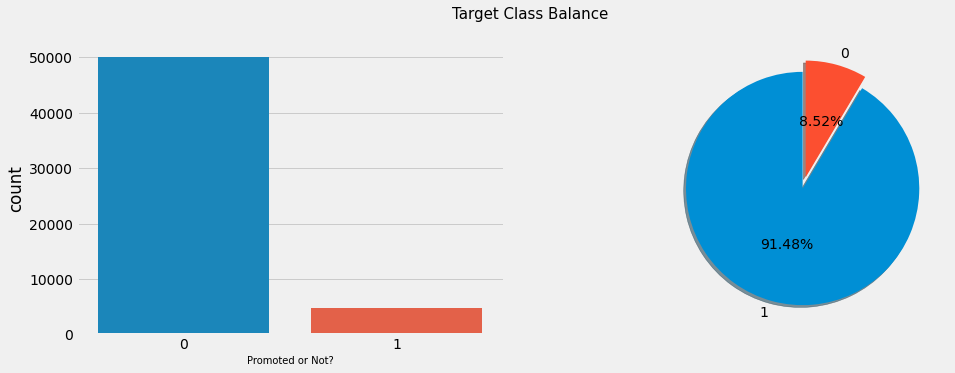

In [ ]:
# lets check the target class Balance

plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
sns.countplot(train['is_promoted'],)

plt.xlabel('Promoted or Not?', fontsize = 10)

plt.subplot(1,2,2)
train['is_promoted'].value_counts().plot(kind = 'pie',explode = [0,0.1], autopct = '%.2f%%', startangle = 90,
                                         labels = ['1','0'],shadow = True, pctdistance = 0.5)
plt.axis('off')

plt.suptitle('Target Class Balance', fontsize = 15)
plt.show()

we can easily, see that the target class is highly imbalanced and we must balanced these classes of target class. most of the time when we use machine learning models with imbalanced classes, we have very poor results which are completely biased towards the class having higher distribution.

**Treatment of Missing Values**


* Treatment of missing values is very imortant step in any machine learning model creation
* Missing values cause due to various reasons such as the filling incomplete forms, values not available etc, 
* There are so many types of missing values such as 
   * Missing values at random
   * Missing values at not random
   * Missing values at completely random
* what can we do to impute or treat missing values to make a good machine learning model
   * we can use the bussines logic to impute missing values 
   * we can use statistical methods such as Mean, Median and Mode.
   * we can use ML Techniques to impute the missing values
   * we can delete the missing values, when the missing values percentage is very high.
* when to use Mean and when to use Median?
   * we use mean when we do not have outliers in the dataset for the numerical variables.
   * we use median when we have outliers in the dataset for the numerical variables.
   * we use mode when we have categorical values











In [ ]:
# missing values in the training dataset

# lets calculate the  total missing values in the dataset
train_total = train.isnull().sum()

# lets calculate the percentage of missing values in the dataset
train_percent = ((train.isnull().sum()/train.shape[0])*100).round(2)

# lets calculate the  total missing values in the dataset
test_total = test.isnull().sum()

# lets calculate the percentage of missing values in the dataset
test_percent = ((test.isnull().sum()/test.shape[0])*100).round(2)

# lets make a dataset consisting of total no. of missing values and percentage of missing values in the dataset
train_missing_data = pd.concat([train_total, train_percent, test_total, test_percent],
                               axis = 1,
                               keys =['Train_total','Train_percent %','Test_total','Test_percent %'],
                               sort = True)

# lets check the head 
train_missing_data.style.bar(color = ['gold'])

,Train_total,Train_percent %,Test_total,Test_percent %
age,0,0.000000,0.000000,0.000000
avg_training_score,0,0.000000,0.000000,0.000000
awards_won?,0,0.000000,0.000000,0.000000
department,0,0.000000,0.000000,0.000000
education,0,0.000000,0.000000,0.000000
employee_id,0,0.000000,0.000000,0.000000
gender,0,0.000000,0.000000,0.000000
is_promoted,0,0.000000,nan,nan
length_of_service,0,0.000000,0.000000,0.000000
no_of_trainings,0,0.000000,0.000000,0.000000


we can see from the above table, that only two columns have missing values in train and test datset both. also, the percentage of missing values is around 4 and 7% in education, and previous_year_rating respectively. so, do not have delete any missing values, we can simply impute the values using mean, median and mode values.


In [ ]:
# lets impute the missing values in the Training Data

train['education'] = train['education'].fillna(train['education'].mode()[0])
train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check weather the Null values are still present or not?
print('number of missing values left in the Training Data :',train.isnull().sum().sum())

number of missing values left in the Training Data : 0


In [ ]:
# lets impute the missing values in the Testing Data

test['education'] = test['education'].fillna(test['education'].mode()[0])
test['previous_year_rating'] = test['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

# lets check weather the Null values are still present or not?
print('number of missing values left in the Testing Data :',test.isnull().sum().sum())

number of missing values left in the Testing Data : 0


we imputed the missing values, using the mode values, even for the previous year rating, it only seems to be numerical, but in real it's also categorical.
after, imputing the missing values in the training and testing dataset we can see that there are no null values left in any of the datasets.

so, we are done with the treatment of the missing values

**Outlier Detection**

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modelling performance instead, automatic outlier detection methods can be used in the modelling pipeline and compared, just like other data preparation transforms that maybe applied to the dataset.

In [ ]:
# lets first analyze the numerical columns
train.select_dtypes('number').head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,1,35,5.0,8,0,49,0
1,65141,1,30,5.0,4,0,60,0
2,7513,1,34,3.0,7,0,50,0
3,2542,2,39,1.0,10,0,50,0
4,48945,1,45,3.0,2,0,73,0


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


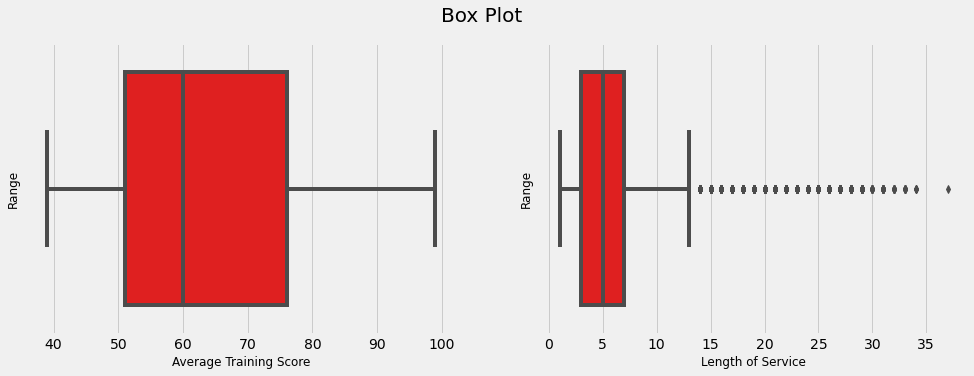

In [ ]:
# lets check for the boxplots for the columns where we suspects for the outliers
plt.rcParams['figure.figsize'] = (15,5)
plt.style.use('fivethirtyeight')

# box plot for average training score]
plt.subplot(1,2,1)
sns.boxplot(train['avg_training_score'],color = 'red')
plt.xlabel('Average Training Score', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

# box plot for average training score]
plt.subplot(1,2,2)
sns.boxplot(train['length_of_service'],color = 'red')
plt.xlabel('Length of Service', fontsize = 12)
plt.ylabel('Range', fontsize = 12)

plt.suptitle('Box Plot', fontsize = 20)
plt.show()

Here the box plot help us to analze the middle 50 percentile of the data, and we can clearly check the minimum, maximum ,median and ouliers values

In the lenght of service attribute, we cans see the points after the max value, which can be termed to be as outliers. we do not need to remove these values, as the values are not very far and huge.

we, also check the distribution of these attributes after checking the boxplot so that we can be more clear about the values present in the columns.|

In [ ]:
# lets remove the ouliers from the length of the service column
train = train[train['length_of_service'] > 13]

**Univariate Analysis**

Univariate analysis is perhaps the simplets form of statistical analysis, like other forms of statistics, it can be inferetial or descriptive. the key fact is that only one variable is involved. Univariate analysis can yield misleading results in cases in which multivariate analysis is more appropriate.



* This is essential step, to understand the variables present in the dataset one by one.
* First, we will check the Univarite Analysis for Numerical columns to check for outliers by using Box plots.
* Then, we will use distribution plots to check the distribution of the numerical columns in the Dataset.
* After that we will check the Univariate Analysis for categorical columns using Pie charts and Count Plots.
* We use the Pie chart, when we have very few categories in the categorical column, and we use count plots we have more categories in the dataset. 







KeyError: ignored

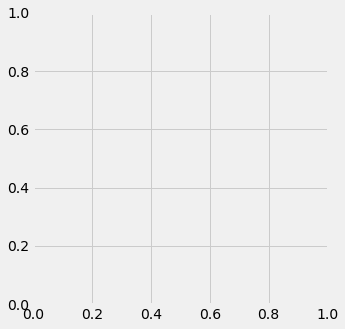

In [ ]:
# lets plot the pie chart for the columns where we have very few categories
plt.rcParams['figure.figsize'] = (16,5)
plt.style.use('fivethirtyeight')

# plotting a pie chart to represent share of previous year Rating of the employees
plt.subplot(1,3,1)
labels = ['0','1']
sizes = train['KPIs_met >80%'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('KPIs Met > 80%',fontsize = 20)

# plotting a pie chart to represent share of previous year Rating of the employees
plt.subplot(1,3,2)
labels = ['1','2','3','4','5']
sizes = train['previous_year_rating'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0,0,0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Previous Year Ratings',fontsize = 20)

# plotting a pie chart to represent share of previous year Rating of the employees
plt.subplot(1,3,3)
labels = ['0','1']
sizes = train['awards_won?'].value_counts()
colors = plt.cm.Wistia(np.linspace(0,1,5))
explode = [0,0.1]

plt.pie(sizes, labels = labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Awards won?',fontsize = 20)


plt.legend()
plt.show()